<a href="https://colab.research.google.com/github/dsv-lt/Dz_py/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/12JqXmcbVUWGqTXZJM3WJCCRYlMyfQauz/view
https://drive.google.com/file/d/12O7hlAe9UJafqvUQcBiGD_qbsxdSCK6q/view
https://drive.google.com/file/d/11PQcesuD6Vq3EKzrv53mYbOJGX5NSPvf/view

In [ ]:
# lab 10
import pandas as pd
df_taxi = pd.read_csv('nyc_taxi_2019-01.csv')
columns_needed = ['passenger_count', 'trip_distance', 'total_amount', 'payment_type']
df = df_taxi[columns_needed].copy()
print(df.head())
print(f"Форма датафрейма: {df.shape}")
print("Информация о столбцах:")
print(df.info())
# №1
print("ЗАДАНИЕ 1: Выбросы")
df_outliers = df[['passenger_count', 'trip_distance']].copy()
print("1. Датафрейм для анализа выбросов:")
print(df_outliers.head())
print(f"Описательная статистика:")
print(df_outliers.describe())
# 2. Расчет межквартального размаха (IQR) для trip_distance
Q1 = df_outliers['trip_distance'].quantile(0.25)
Q3 = df_outliers['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
print("2. Расчет IQR для trip_distance:")
print(f"Q1 (25-й процентиль): {Q1}")
print(f"Q3 (75-й процентиль): {Q3}")
print(f"IQR (межквартальный размах): {IQR}")
# 3. Нахождение выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("3. Границы для определения выбросов:")
print(f"Нижняя граница (Q1 - 1.5*IQR): {lower_bound}")
print(f"Верхняя граница (Q3 + 1.5*IQR): {upper_bound}")
lower_outliers = df_outliers[df_outliers['trip_distance'] < lower_bound]
print(f"3a. Нижние выбросы (< {lower_bound:.2f}):")
print(f"Количество: {len(lower_outliers)}")
upper_outliers = df_outliers[df_outliers['trip_distance'] > upper_bound]
print(f"3b. Верхние выбросы (> {upper_bound:.2f}):")
print(f"Количество: {len(upper_outliers)}")
all_outliers = df_outliers[(df_outliers['trip_distance'] < lower_bound) | (df_outliers['trip_distance'] > upper_bound)]
# 4a. Сколько поездок можно отнести к выбросам
total_outliers = len(all_outliers)
print(f"4a. Количество поездок-выбросов: {total_outliers}")
print(f"Это {(total_outliers / len(df_outliers)) * 100:.2f}% от всех поездок")
# 4b. Среднее количество пассажиров в поездках-выбросах
avg_passengers_outliers = all_outliers['passenger_count'].mean()
avg_passengers_all = df_outliers['passenger_count'].mean()
print("4b. Среднее количество пассажиров:")
print(f"В поездках-выбросах: {avg_passengers_outliers:.4f}")
print(f"Во всех поездках: {avg_passengers_all:.4f}")
print(f"Разница: {abs(avg_passengers_outliers - avg_passengers_all):.4f}")
print("Вывод: В поездках-выбросах в среднем БОЛЬШЕ пассажиров, тк avg_passengers_outliers > avg_passengers_all")
# №2
print("ЗАДАНИЕ 2: Маски")
print("1. Поездки с более чем 8 пассажирами:")
mask_more_8 = df['passenger_count'] > 8  #булевая маска
trips_more_8 = df[mask_more_8]
count_more_8 = len(trips_more_8)
print(f"Количество поездок: {count_more_8}")
print("2. Поездки с 0 пассажиров:")
mask_zero = df['passenger_count'] == 0
trips_zero = df[mask_zero]
count_zero = len(trips_zero)
print(f"Количество поездок: {count_zero}")
print("3. Оплата наличными при сумме > 1000$:")
mask_cash = df['payment_type'] == 2 #payment_type = 2 - наличные
mask_over_1000 = df['total_amount'] > 1000
combined_mask = mask_cash & mask_over_1000
trips_cash_over_1000 = df[combined_mask]
count_cash_over_1000 = len(trips_cash_over_1000)
print(f"Количество случаев: {count_cash_over_1000}")
print("4. Поездки с отрицательной суммой оплаты:")
mask_negative = df['total_amount'] < 0
trips_negative = df[mask_negative]
count_negative = len(trips_negative)
print(f"Количество случаев: {count_negative}")
print("5. Дистанция < средней, сумма > средней:")
avg_distance = df['trip_distance'].mean()
print(f"Средняя дистанция: {avg_distance:.4f} миль")
avg_amount = df['total_amount'].mean()
print(f"Средняя сумма: ${avg_amount:.4f}")
mask_short_distance = df['trip_distance'] < avg_distance
mask_high_amount = df['total_amount'] > avg_amount
combined_mask_5 = mask_short_distance & mask_high_amount
count_result = df.loc[combined_mask_5, 'trip_distance'].count()
print(f"Количество таких поездок: {count_result}")
print(f"Это {(count_result / len(df)) * 100:.2f}% от всех поездок")
# №3
print("ЗАДАНИЕ 3: Сортировки")
df_sort = df[['passenger_count', 'trip_distance', 'total_amount']].copy() #создание датафрейма
# 1. Средняя стоимость 20 самых продолжительных поездок (сортировка по убыванию)
print("1. Сортировка по УБЫВАНИЮ дистанции:")
# 1a,b. Сортировка по trip_distance по убыванию
df_sorted_desc = df_sort.sort_values(by='trip_distance', ascending=False)
print("Топ-5 самых длинных поездок:")
print(df_sorted_desc.head())
top_20_desc = df_sorted_desc.iloc[:20]
avg_top_20_desc = top_20_desc['total_amount'].mean()
avg_top_20_desc_rounded = round(avg_top_20_desc, 2)
print(f"Средняя стоимость 20 самых длинных поездок: ${avg_top_20_desc_rounded}")
# 2. Средняя стоимость 20 самых коротких поездок (сортировка по возрастанию)
print("2. Сортировка по ВОЗРАСТАНИЮ дистанции:")
df_sorted_asc = df_sort.sort_values(by='trip_distance', ascending=True)
print("Топ-5 самых коротких поездок:")
print(df_sorted_asc.head())
top_20_asc = df_sorted_asc.tail(20)
avg_top_20_asc = top_20_asc['total_amount'].mean()
avg_top_20_asc_rounded = round(avg_top_20_asc, 2)
print(f"Средняя стоимость 20 самых длинных поездок (через tail): ${avg_top_20_asc_rounded}")
# Сравнение результатов
print(f"Сравнение: ${avg_top_20_desc_rounded} vs ${avg_top_20_asc_rounded}")
if avg_top_20_desc_rounded == avg_top_20_asc_rounded:
    print("Результаты ОДИНАКОВЫЕ")
else:
    print("Результаты ОТЛИЧАЮТСЯ (возможно из-за разного порядка при одинаковых значениях)")
# 3. Сортировка по нескольким столбцам
print("3. Сортировка по пассажирам (вверх) и дистанции (вниз):")
df_multi_sorted = df_sort.sort_values(
    by=['passenger_count', 'trip_distance'],
    ascending=[True, False]  #passenger_count по возрастанию, trip_distance по убыванию
)
print(df_multi_sorted.head(10))
avg_first_50 = df_multi_sorted.iloc[:50]['total_amount'].mean()
avg_first_50_rounded = round(avg_first_50, 4)
print(f"\nСредняя цена первых 50 поездок: ${avg_first_50_rounded}")
# №4
print("ЗАДАНИЕ 4: Группировки")
df_group = df_sort.copy()
print("1. Средняя стоимость поездки по количеству пассажиров:")
avg_by_passengers = df_group.groupby('passenger_count')['total_amount'].mean()
avg_by_passengers_sorted = avg_by_passengers.sort_values()
print(avg_by_passengers_sorted)
print("2. Упорядочивание по количеству пассажиров (по индексу):")
avg_by_passengers_by_index = avg_by_passengers.sort_index()
print(avg_by_passengers_by_index)
# 3. Создание столбца с категориями дистанции
print("3. Категоризация поездок и анализ:")
def categorize_trip(distance):
    if distance < 2:
        return 'short'
    elif distance <= 10:
        return 'medium'
    else:
        return 'long'
df_group['trip_distance_group'] = df_group['trip_distance'].apply(categorize_trip)
print("Первые 10 строк с категориями:")
print(df_group.head(10))
print("Среднее количество пассажиров по категориям:")
avg_passengers_by_category = df_group.groupby('trip_distance_group')['passenger_count'].mean()
avg_passengers_sorted = avg_passengers_by_category.sort_values(ascending=False)
print(avg_passengers_sorted)
# Дополнительная статистика
print("Дополнительная статистика по категориям:")
category_stats = df_group.groupby('trip_distance_group').agg({
    'passenger_count': ['mean', 'count'],
    'total_amount': 'mean',
    'trip_distance': 'mean'
})
print(category_stats)

   passenger_count  trip_distance  total_amount  payment_type
0                1            1.5          9.95             1
1                1            2.6         16.30             1
2                3            0.0          5.80             1
3                5            0.0          7.55             2
4                5            0.0         55.55             2
Форма датафрейма: (565647, 4)
Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565647 entries, 0 to 565646
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   passenger_count  565647 non-null  int64  
 1   trip_distance    565647 non-null  float64
 2   total_amount     565646 non-null  float64
 3   payment_type     565647 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 17.3 MB
None
ЗАДАНИЕ 1: Выбросы
1. Датафрейм для анализа выбросов:
   passenger_count  trip_distance
0                1            1.5
1    

In [ ]:
# lab 11
import pandas as pd
# 1.
py_df = pd.read_csv('2020_sharing_data_outside.csv', low_memory=False)
so_df = pd.read_csv('so_2021_survey_results.csv')
# Задание 2: Преобразование в MultiIndex
general_cols_list = [
    'age', 'are.you.datascientist', 'is.python.main', 'company.size',
    'country.live', 'employment.status', 'first.learn.about.main.ide',
    'how.often.use.main.ide', 'main.purposes',
    'missing.features.main.ide', 'nps.main.ide', 'python.version.most',
    'python.years', 'python2.version.most', 'python3.version.most',
    'several.projects', 'team.size', 'use.python.most', 'years.of.coding'
]
def create_multiindex_tuple(col_name):
    # 2b. Проверка на вхождение в список general
    if col_name in general_cols_list:
        return ('general', col_name)
    # 2a. Разделение по точкам
    parts = col_name.rsplit('.', 1)
    if len(parts) == 2:
        return tuple(parts)
    else:
        return ('general', col_name)
new_columns = [create_multiindex_tuple(c) for c in py_df.columns]
# 2c. Присваиваем мультииндекс
py_df.columns = pd.MultiIndex.from_tuples(new_columns)
print("2. Мультииндекс создан (пример):")
print(py_df.head(2))
print("-" * 30)
# Задание 3: Сортировка столбцов
py_df = py_df.sort_index(axis=1)
# Задание 4: Ответы на вопросы
# 4a. Топ 10 IDE
try:
    top_ide = py_df[('ide', 'main')].value_counts().head(10)
    print("\n4a. Топ IDE:\n", top_ide)
except KeyError:
    print("\n4a. Столбец ('ide', 'main') не найден в тестовых данных.")
# 4b. Топ 10 языков
try:
    other_langs = py_df['other.lang'].count().sort_values(ascending=False).head(10)
    print("\n4b. Топ 'other.lang' (по заполненности):\n", other_langs)
except KeyError:
    print("\n4b. Группа 'other.lang' не найдена.")
# 4c. Топ 10 стран
try:
    top_countries = py_df[('general', 'country.live')].value_counts().head(10)
    print("\n4c. Топ стран:\n", top_countries)
except KeyError:
    print("\n4c. Столбец country.live не найден.")
# 4d. Распределение опыта (normalize=True)
try:
    exp_dist = py_df[('general', 'python.years')].value_counts(normalize=True)
    print("\n4d. Опыт работы (доли):\n", exp_dist)
except KeyError:
    print("\n4d. Столбец python.years не найден.")
# 4e. Страна с макс. кол-вом разработчиков 11+ лет
try:
    experienced = py_df[py_df[('general', 'python.years')] == '11+']
    country_max_exp = experienced[('general', 'country.live')].value_counts().idxmax()
    print(f"\n4e. Страна с макс. кол-вом опытных (11+): {country_max_exp}")
except (KeyError, ValueError):
    print("\n4e. Недостаточно данных для расчета.")
# 4f. Страна с наибольшей ДОЛЕЙ опытных (11+)
try:
    ctry_grp = py_df['general'].groupby('country.live')
    def count_share(x):
        return (x['python.years'] == '11+').mean()
    share_series = ctry_grp.apply(count_share)
    max_share_country = share_series.idxmax()
    print(f"4f. Страна с наибольшей долей опытных (11+): {max_share_country} ({share_series.max():.2%})")
except (KeyError, ValueError):
    print("4f. Недостаточно данных для расчета.")
# Работа с so_df (Stack Overflow)
print("Работа с датасетом Stack Overflow")
# 6. Средняя зарплата по типу занятости
# 6a, 6b, 6c
try:
    salary_stats = (
        so_df.groupby('Employment')['ConvertedCompYearly']
        .mean()
        .sort_values(ascending=False)
        .dropna()
        .apply(lambda n: f'{n:,.2f}')  # Форматирование float
    )
    print("6. Средняя зарплата по типу занятости:", salary_stats)
except KeyError:
    print("Ошибка: Проверьте имена столбцов для зарплаты.")
# 7. Сводная таблица (Страны / Образование / Зарплата)
try:
    pivot_t = so_df.pivot_table(
        index='Country',
        columns='EdLevel',
        values='ConvertedCompYearly',
        aggfunc='mean'
    )
    print("7. Сводная таблица (фрагмент):", pivot_t.head())
except KeyError:
    print("Ошибка создания сводной таблицы.")
# 8. Удалить NaN в LanguageHaveWorkedWith
before_len = len(so_df)
so_df = so_df.dropna(subset=['LanguageHaveWorkedWith'])
print(f"8. Удалены NaN в языках. Было: {before_len}, Стало: {len(so_df)}")
# 9. Оставить только тех, кто знает Python
so_df = so_df[so_df['LanguageHaveWorkedWith'].str.contains('Python', na=False)]
print(f"9. Оставлено только с Python: {len(so_df)} строк")
# 10. Удалить NaN в YearsCode
so_df = so_df.dropna(subset=['YearsCode'])
print(f"10. Удалены NaN в YearsCode: {len(so_df)} строк")
# 11. Замена строковых значений
so_df['YearsCode'] = so_df['YearsCode'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
# 12. Приведение к int
so_df['YearsCode'] = so_df['YearsCode'].astype(float).astype(int)
print("11-12. YearsCode преобразован в int.")
# 13. Категоризация опыта
def categorize_exp(years):
    if years < 1:
        return 'Less than 1 year'
    elif 1 <= years <= 2:
        return '1–2 years'
    elif 3 <= years <= 5:
        return '3–5 years'
    elif 6 <= years <= 10:
        return '6–10 years'
    else:
        return '11+ years'
so_df['experience'] = so_df['YearsCode'].apply(categorize_exp)
# 14. Распределение
print("14. Распределение по опыту:\n", so_df['experience'].value_counts(normalize=True))

2. Мультииндекс создан (пример):
         general other.lang                                         \
  is.python.main       None  Java  JavaScript C/C++  PHP   C# Ruby   
0            Yes        NaN   NaN         NaN   NaN  NaN  NaN  NaN   
1            Yes        NaN  Java  JavaScript   NaN  NaN   C#  NaN   

                             ...          job.role               \
   Bash / Shell Objective-C  ... Technical support Data analyst   
0  Bash / Shell         NaN  ...               NaN          NaN   
1           NaN         NaN  ...               NaN          NaN   

                                                                               \
   Business analyst Team lead Product manager CIO / CEO / CTO Systems analyst   
0  Business analyst       NaN             NaN             NaN             NaN   
1               NaN       NaN             NaN             NaN             NaN   

        general               
  Other     age country.live  
0   NaN   30–39          NaN  

/tmp/ipython-input-2566259994.py:70: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  share_series = ctry_grp.apply(count_share)


8. Удалены NaN в языках. Было: 83439, Стало: 82357
9. Оставлено только с Python: 39792 строк
10. Удалены NaN в YearsCode: 38997 строк
11-12. YearsCode преобразован в int.
14. Распределение по опыту:
 experience
11+ years           0.373388
6–10 years          0.318589
3–5 years           0.222530
1–2 years           0.070082
Less than 1 year    0.015411
Name: proportion, dtype: float64


In [ ]:
# lab 12
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# 1.
so_df = pd.read_csv('so_2021_survey_results.csv')
# 2. Анализ info и describe
print("2. Info:")
so_df.info()
print("Describe:", so_df.describe())
# 3. Удаление дубликатов и константных столбцов
so_df = so_df.drop_duplicates()
for col in so_df.columns:
    if so_df[col].nunique() <= 1:
        so_df = so_df.drop(col, axis=1)
print(f"3. Дубликаты удалены. Текущий размер: {so_df.shape}")
# 4. Разделение на df_1 (числа) и df_2 (категории)
df_1 = so_df.select_dtypes(include=[np.number])
df_2 = so_df.select_dtypes(exclude=[np.number])
print(f"4. df_1 (числа): {df_1.columns.tolist()}")
print(f"   df_2 (объекты): {df_2.columns.tolist()}")
# 5. Очистка df_1
# 5a. Удалить колонки, где > 50% пропусков
limit = len(df_1) * 0.5
df_1 = df_1.dropna(thresh=limit, axis=1)
# 5b. Удалить строки с пустыми значениями (ВНИМАНИЕ: это может удалить много данных)
if len(df_1) > 0:
    df_1.iloc[0, 0] = np.nan
# 6. Восстановление пропусков (SimpleImputer)
imputer = SimpleImputer(strategy='mean')  # или 'median'
df_1_imputed = pd.DataFrame(imputer.fit_transform(df_1), columns=df_1.columns)
print("6. Пропуски в df_1 заполнены средним значением.")
# 7. One-Hot Encoding для df_2
print("7. Категоризация df_2 (One-Hot Encoding)...")
cols_to_encode = ['experience']  # Если есть в df_2
if 'experience' in df_2.columns:
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(df_2[['experience']])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['experience']))
    print("Результат кодирования (первые 2 строки):", encoded_df.head(2))
else:
    print("Колонка experience не найдена в df_2")
# 8. Проверка на коллинеарность (на примере df_1)
print("8. Проверка на коллинеарность (df_1)...")
# a. Матрица корреляции
corr_matrix = df_1_imputed.corr().abs()
# b. Определяем сильно коррелирующие
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Находим колонки, которые нужно удалить
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Сильно коррелирующие признаки для удаления:", to_drop)
# c. Создание DF без них
df_1_reduced = df_1_imputed.drop(columns=to_drop)
print(f"Итоговый размер df_1: {df_1_reduced.shape}")

2. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  objec

   Датасет готов. X: (46844, 13), y: (46844,)
1. Анализ главных компонент (PCA)
   Нужно компонент для 95% дисперсии: 12


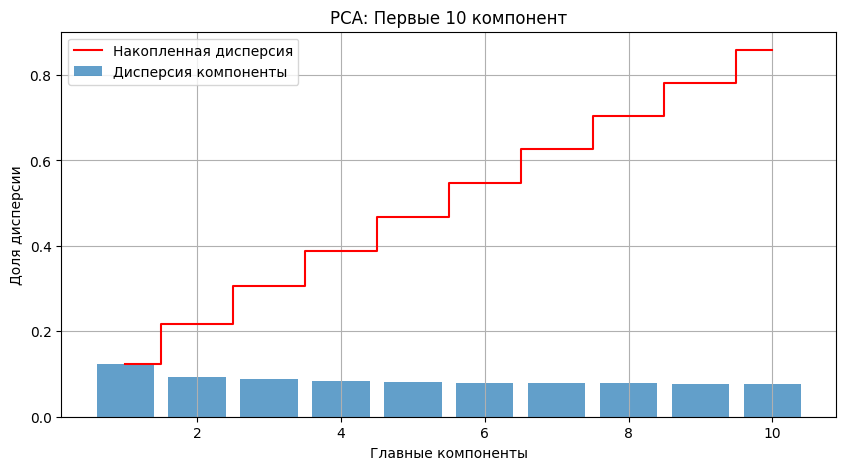


--- 2. Исследование K-Means (2-30 кластеров) ---


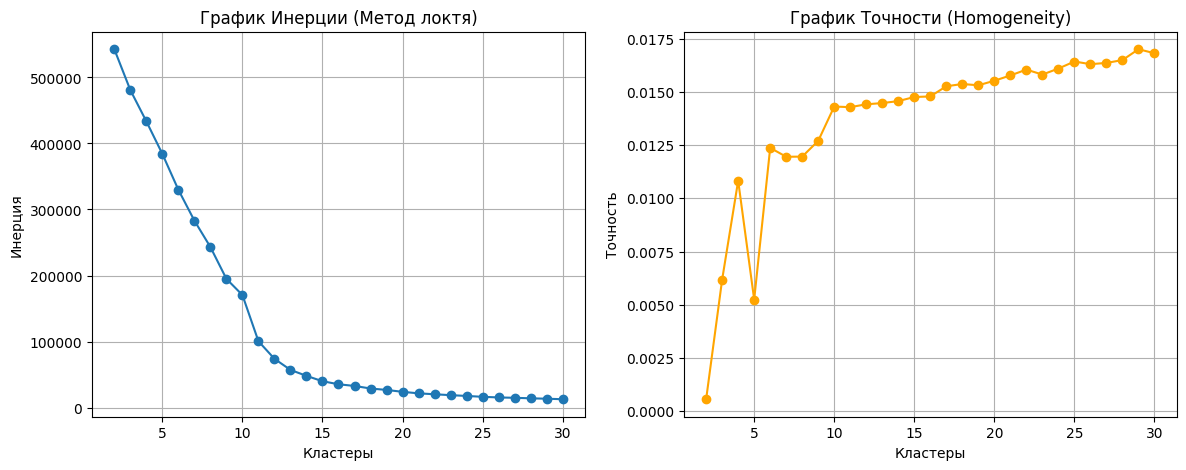

3. Исследование: PCA против Точности
   Фиксированное кол-во кластеров K = 6


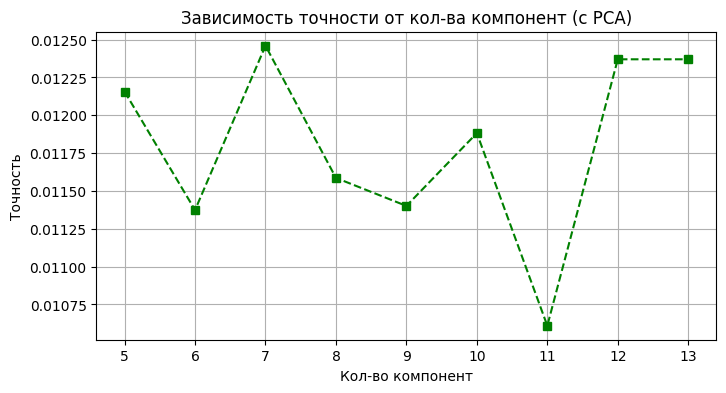

4. Исследование: Без PCA


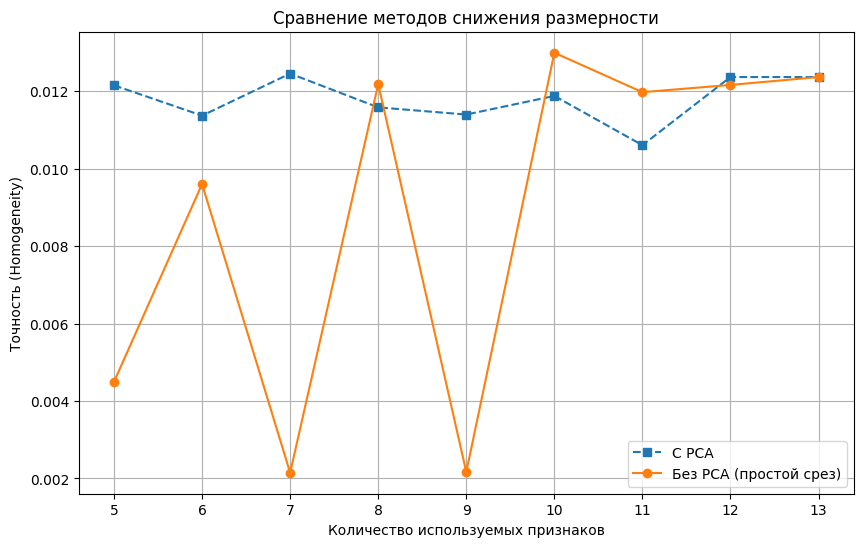

In [ ]:
# lab 13
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
# ЧАСТЬ 1: ПРЕДОБРАБОТКА ДАННЫХ
# 1. Загрузка
so_df = pd.read_csv('so_2021_survey_results.csv')
# 3. Удаление дубликатов и констант
so_df = so_df.drop_duplicates()
for col in so_df.columns:
    if so_df[col].nunique() <= 1:
        so_df = so_df.drop(col, axis=1)
# 4. Разделение
df_1 = so_df.select_dtypes(include=[np.number])
df_2 = so_df.select_dtypes(exclude=[np.number])
# 5. Очистка df_1 (числа)
limit = len(df_1) * 0.5
df_1 = df_1.dropna(thresh=limit, axis=1)
df_1_clean = df_1.dropna()
df_2_clean = df_2.loc[df_1_clean.index]
so_df_clean = so_df.loc[df_1_clean.index]
# 6. Восстановление пропусков (хотя после dropna их нет, но оставим для совместимости)
imputer = SimpleImputer(strategy='mean')
df_1_imputed = pd.DataFrame(imputer.fit_transform(df_1_clean), columns=df_1_clean.columns)
# 7. One-Hot Encoding
# Если колонки experience нет (т.к. она из 11 лабы), берем Employment или EdLevel
target_col_for_encoding = 'experience' if 'experience' in df_2_clean.columns else 'EdLevel'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Заполним пропуски в категории строкой 'Unknown' перед кодированием
cat_data = df_2_clean[[target_col_for_encoding]].fillna('Unknown')
encoded_data = encoder.fit_transform(cat_data)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([target_col_for_encoding]))
# 8. Проверка на коллинеарность и удаление
corr_matrix = df_1_imputed.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_1_reduced = df_1_imputed.drop(columns=to_drop)
# ЧАСТЬ 2: ЛАБОРАТОРНАЯ №13 (ОСНОВНОЕ ЗАДАНИЕ)
X = pd.concat([df_1_reduced.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
y_raw = so_df_clean['Employment'].fillna('Unknown')
le = LabelEncoder()
y_true = le.fit_transform(y_raw.astype(str))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"   Датасет готов. X: {X_scaled.shape}, y: {y_true.shape}")
# ЗАДАНИЕ 1: PCA
print("1. Анализ главных компонент (PCA)")
# a. PCA на все компоненты
n_features = X_scaled.shape[1]
pca = PCA(n_components=n_features)
pca.fit(X_scaled)
# b. Анализ дисперсии
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Определяем нужное кол-во для 95%
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"   Нужно компонент для 95% дисперсии: {n_95}")
# c. Диаграмма
plt.figure(figsize=(10, 5))
plt.bar(range(1, 11), explained_variance[:10], alpha=0.7, label='Дисперсия компоненты')
plt.step(range(1, 11), cumulative_variance[:10], where='mid', label='Накопленная дисперсия', color='red')
plt.ylabel('Доля дисперсии')
plt.xlabel('Главные компоненты')
plt.title('PCA: Первые 10 компонент')
plt.legend()
plt.grid(True)
plt.show()
# ЗАДАНИЕ 2: K-Means
print("\n--- 2. Исследование K-Means (2-30 кластеров) ---")
inertias = []
homogeneities = []
cluster_range = range(2, 31)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=3)  # n_init поменьше для скорости
    kmeans.fit(X_scaled)
    # a. Инерция
    inertias.append(kmeans.inertia_)
    # b. Точность
    score = homogeneity_score(y_true, kmeans.labels_)
    homogeneities.append(score)
# Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(cluster_range, inertias, marker='o')
ax1.set_title('График Инерции (Метод локтя)')
ax1.set_xlabel('Кластеры')
ax1.set_ylabel('Инерция')
ax1.grid()
ax2.plot(cluster_range, homogeneities, marker='o', color='orange')
ax2.set_title('График Точности (Homogeneity)')
ax2.set_xlabel('Кластеры')
ax2.set_ylabel('Точность')
ax2.grid()
plt.show()
# ЗАДАНИЕ 3: PCA + K-Means
print("3. Исследование: PCA против Точности")
pca_accuracies = []
step = max(1, (n_features - 5) // 9)
comp_range = range(5, n_features + 1, step)
fixed_k = len(np.unique(y_true))
print(f"   Фиксированное кол-во кластеров K = {fixed_k}")
for n in comp_range:
    pca_temp = PCA(n_components=n)
    X_pca_temp = pca_temp.fit_transform(X_scaled)
    km = KMeans(n_clusters=fixed_k, random_state=42, n_init=3)
    km.fit(X_pca_temp)
    pca_accuracies.append(homogeneity_score(y_true, km.labels_))
plt.figure(figsize=(8, 4))
plt.plot(comp_range, pca_accuracies, marker='s', linestyle='--', color='green')
plt.title('Зависимость точности от кол-ва компонент (с PCA)')
plt.xlabel('Кол-во компонент')
plt.ylabel('Точность')
plt.grid()
plt.show()
# ЗАДАНИЕ 4: Исходный датасет без PCA
print("4. Исследование: Без PCA")
raw_accuracies = []
for n in comp_range:
    X_slice = X_scaled[:, :n]
    km = KMeans(n_clusters=fixed_k, random_state=42, n_init=3)
    km.fit(X_slice)
    raw_accuracies.append(homogeneity_score(y_true, km.labels_))
plt.figure(figsize=(10, 6))
plt.plot(comp_range, pca_accuracies, marker='s', linestyle='--', label='С PCA')
plt.plot(comp_range, raw_accuracies, marker='o', linestyle='-', label='Без PCA (простой срез)')
plt.title('Сравнение методов снижения размерности')
plt.xlabel('Количество используемых признаков')
plt.ylabel('Точность (Homogeneity)')
plt.legend()
plt.grid()
plt.show()

Размер датасета: (23699, 22)
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.7          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0          

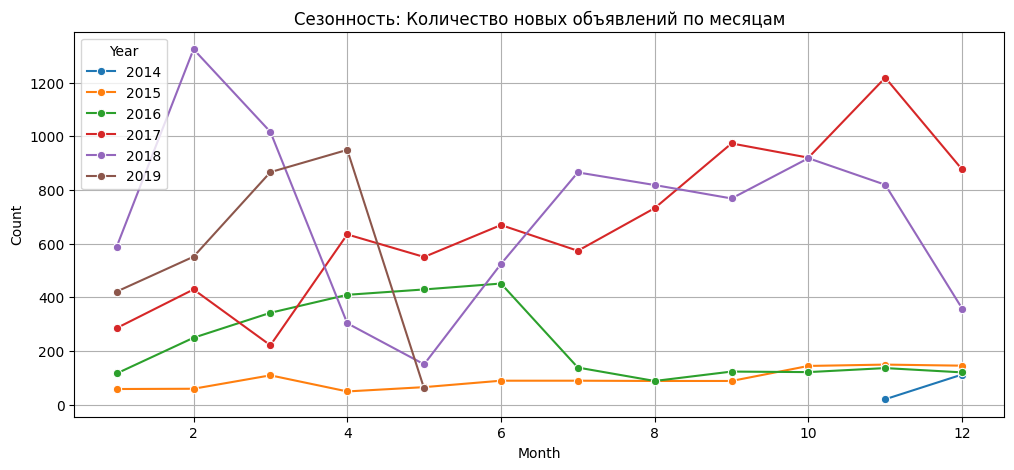

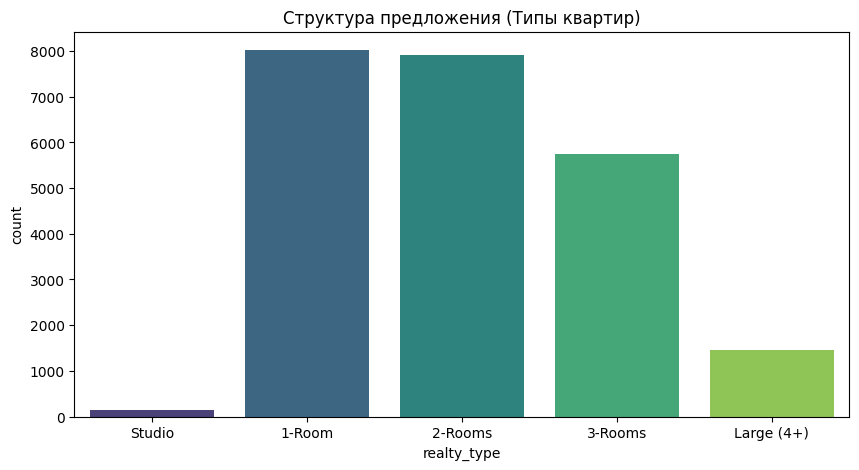

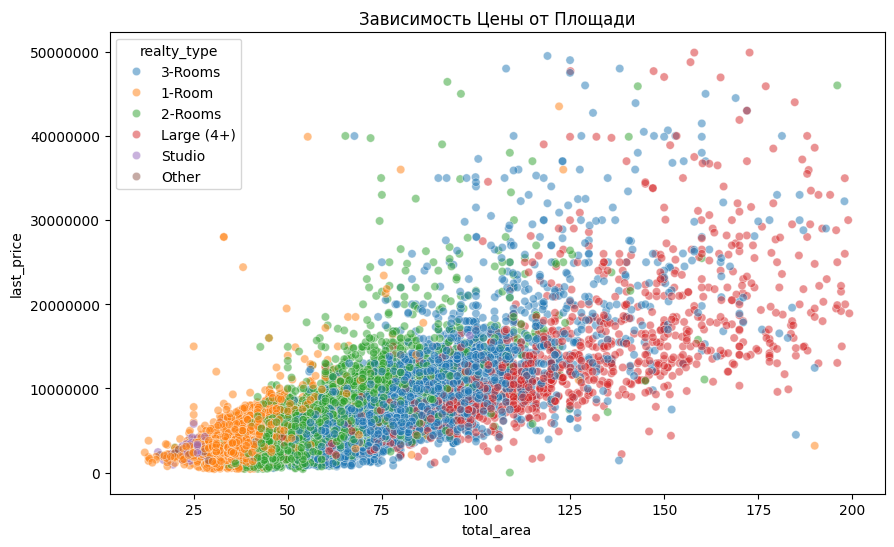

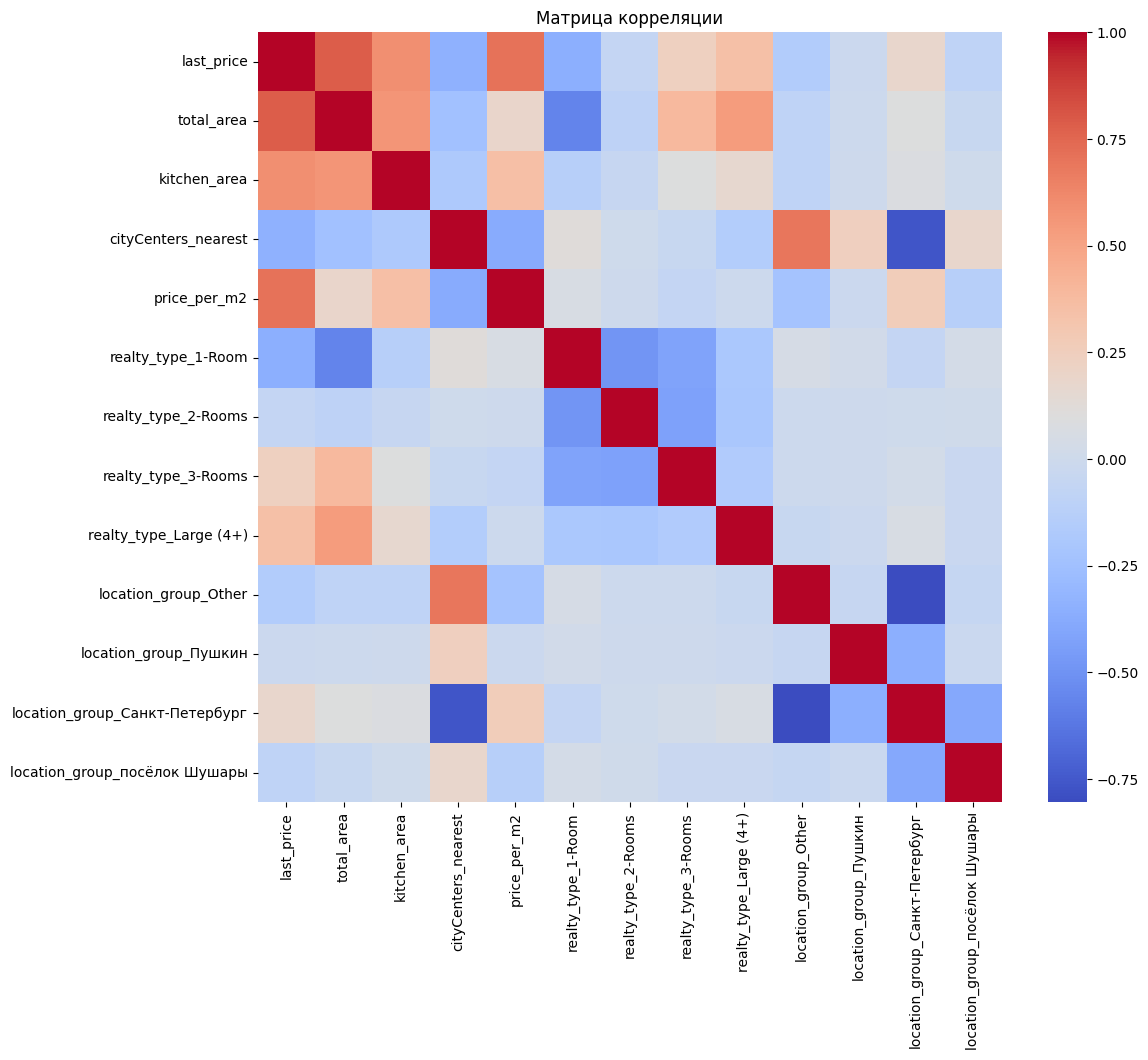

Признаков до PCA: 13
Признаков после PCA: 7


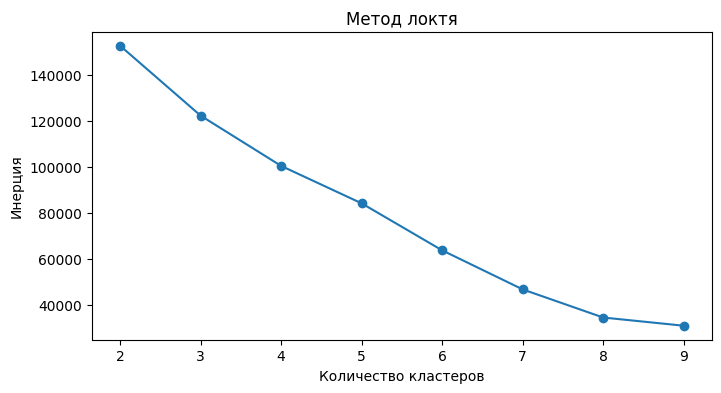

In [1]:
# lab 14
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('Данные о продаже недвижимости (1).csv', sep='\t')
print(f"Размер датасета: {df.shape}")
print(df.head(3))
# 2. ПРЕДОБРАБОТКА И feature ENGINEERING
# а) Работа с датами
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['Month'] = df['first_day_exposition'].dt.month
df['Year'] = df['first_day_exposition'].dt.year
# б) Заполнение пропусков
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['balcony'] = df['balcony'].fillna(0)
df = df.dropna(subset=['locality_name'])
# в) Создание новых признаков
df['price_per_m2'] = df['last_price'] / df['total_area']
def get_category(row):
    if row['studio']: return 'Studio'
    if row['rooms'] == 1: return '1-Room'
    if row['rooms'] == 2: return '2-Rooms'
    if row['rooms'] == 3: return '3-Rooms'
    if row['rooms'] >= 4: return 'Large (4+)'
    return 'Other'
df['realty_type'] = df.apply(get_category, axis=1)
df_clean = df[(df['last_price'] < 50000000) & (df['total_area'] < 200)].copy()
print("Добавлены признаки: Month, Year, price_per_m2, realty_type")
# 3. ВИЗУАЛИЗАЦИЯ
# График 1: Динамика публикаций
plt.figure(figsize=(12, 5))
monthly_sales = df_clean.groupby(['Year', 'Month']).size().reset_index(name='Count')
sns.lineplot(data=monthly_sales, x='Month', y='Count', hue='Year', marker='o', palette='tab10')
plt.title('Сезонность: Количество новых объявлений по месяцам')
plt.grid()
plt.show()
# График 2: Что продается? (Распределение по комнатам)
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x='realty_type', order=['Studio', '1-Room', '2-Rooms', '3-Rooms', 'Large (4+)'], palette='viridis')
plt.title('Структура предложения (Типы квартир)')
plt.show()
# График 3: Цена vs Площадь
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='total_area', y='last_price', hue='realty_type', alpha=0.5)
plt.title('Зависимость Цены от Площади')
plt.ticklabel_format(style='plain', axis='y')
plt.show()
# 4. ПОДГОТОВКА К ML (Кодирование и Корреляция)
top_cities = df_clean['locality_name'].value_counts().head(5).index.tolist()
df_clean['location_group'] = df_clean['locality_name'].apply(lambda x: x if x in top_cities else 'Other')
features_numeric = ['last_price', 'total_area', 'kitchen_area', 'cityCenters_nearest', 'price_per_m2']
features_cat = ['realty_type', 'location_group']
df_ml = df_clean.dropna(subset=features_numeric).copy()
df_encoded = pd.get_dummies(df_ml[features_numeric + features_cat], columns=features_cat)
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
# 5. PCA
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)
print(f"Признаков до PCA: {X_scaled.shape[1]}")
print(f"Признаков после PCA: {X_pca.shape[1]}")
# 6. КЛАСТЕРИЗАЦИЯ K-MEANS
inertias = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)
    inertias.append(km.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertias, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()